**DATA IN**

In [1]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('./volkswagen_e_golf.csv')

## print shape of dataset with rows and columns
print(data.shape)

(3345, 18)


In [3]:
# print the top5 records
data.head()

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [4]:
#type checking
data.dtypes

manufacturer               object
model                      object
version                    object
power(kW)                   int64
fuel_date                  object
trip_distance(km)          object
quantity(kWh)             float64
fuel_type                  object
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
ecr_deviation             float64
dtype: object

In [5]:
#type conversion
def tryconvert(value, default, t):
    if t == 'numeric':
        try:
            return float(value)
        except (ValueError, TypeError):
            return default
    if t == 'str':
        try:
            return str(value)
        except (ValueError, TypeError):
            return default

In [6]:

#trip distance is a float value
data['trip_distance(km)'] = data['trip_distance(km)'].map(lambda x : tryconvert(x, np.nan, 'numeric') )

In [7]:
#type checking
data.dtypes

manufacturer               object
model                      object
version                    object
power(kW)                   int64
fuel_date                  object
trip_distance(km)         float64
quantity(kWh)             float64
fuel_type                  object
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
ecr_deviation             float64
dtype: object

In [8]:
#Drop unwanted features and save
data.drop(axis = 1, columns = ['manufacturer', 'model', 'version', 'power(kW)', 'fuel_type', 'fuel_date'], inplace=True)
# store in a file
# data.to_csv('.//stage_0.csv', index= False)

* All the rows/ records with missing values of Trip_Distance(km) should be removed. These values cannot be imputed, because this is the target variable.

In [9]:
data = data[data['trip_distance(km)'].isnull() == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 0 to 3344
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_distance(km)       3341 non-null   float64
 1   quantity(kWh)           3340 non-null   float64
 2   tire_type               3341 non-null   object 
 3   city                    3341 non-null   int64  
 4   motor_way               3341 non-null   int64  
 5   country_roads           3341 non-null   int64  
 6   driving_style           3341 non-null   object 
 7   consumption(kWh/100km)  3341 non-null   float64
 8   A/C                     3341 non-null   int64  
 9   park_heating            3341 non-null   int64  
 10  avg_speed(km/h)         3329 non-null   float64
 11  ecr_deviation           3341 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 339.3+ KB


* Data Analysis

In [10]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  10


,trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,80.0,NaN,0,0,1,17.8,0,1,53.0,1.0
1,50.0,12.29,0,0,1,15.5,0,1,47.0,-1.3
2,43.0,8.68,0,1,1,18.0,0,1,58.0,1.2
3,44.0,1.50,0,1,1,16.1,0,1,43.0,-0.7
4,76.0,14.44,0,1,0,19.0,0,1,76.0,2.2


In [11]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [13]:
data[discrete_feature].head()

,city,motor_way,country_roads,A/C,park_heating
0,0,0,1,0,1
1,0,0,1,0,1
2,0,1,1,0,1
3,0,1,1,0,1
4,0,1,0,0,1


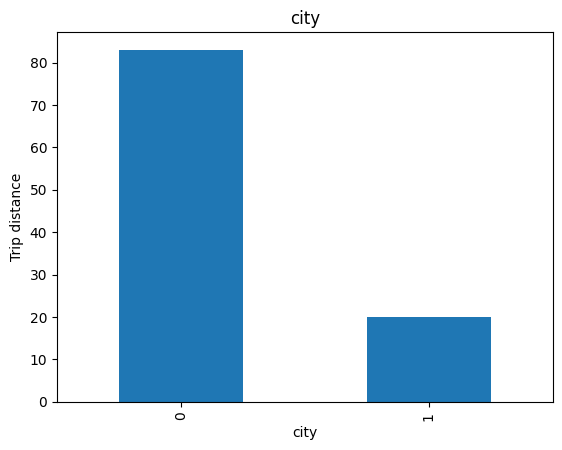

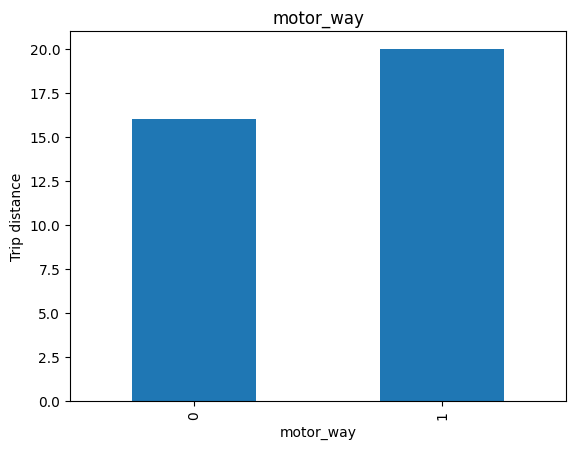

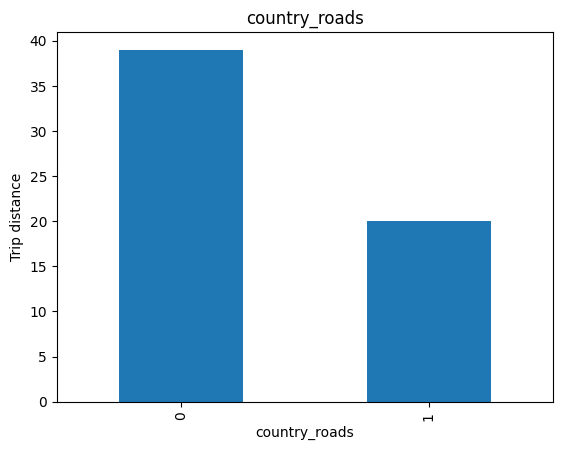

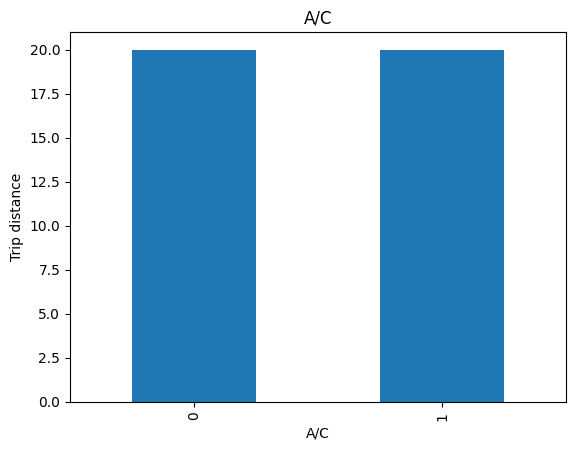

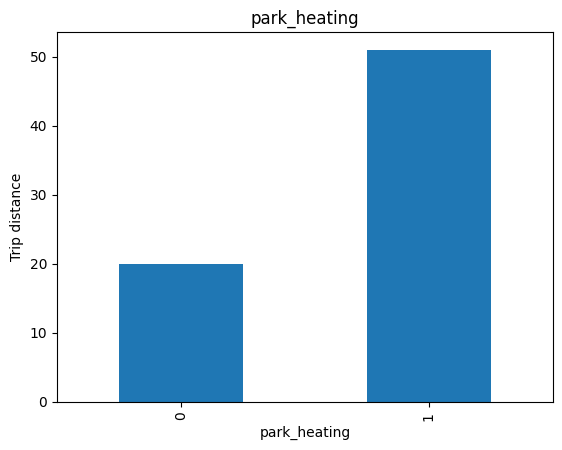

In [14]:
## The realtionship between them and trip distance

for feature in discrete_feature:
    data1=data.copy()
    data1.groupby(feature)['trip_distance(km)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Trip distance')
    plt.title(feature)
    plt.show()

<Axes: xlabel='driving_style', ylabel='frequency'>

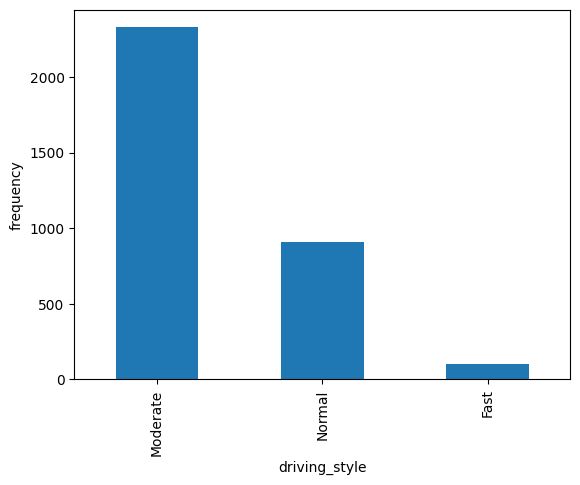

In [15]:
fig, ax = plt.subplots()
data['driving_style'].value_counts().plot(ax=ax, kind='bar', xlabel='driving_style', ylabel='frequency')

In [16]:
## continous featues
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [17]:
data[continuous_feature].head()

,trip_distance(km),quantity(kWh),consumption(kWh/100km),avg_speed(km/h),ecr_deviation
0,80.0,NaN,17.8,53.0,1.0
1,50.0,12.29,15.5,47.0,-1.3
2,43.0,8.68,18.0,58.0,1.2
3,44.0,1.50,16.1,43.0,-0.7
4,76.0,14.44,19.0,76.0,2.2


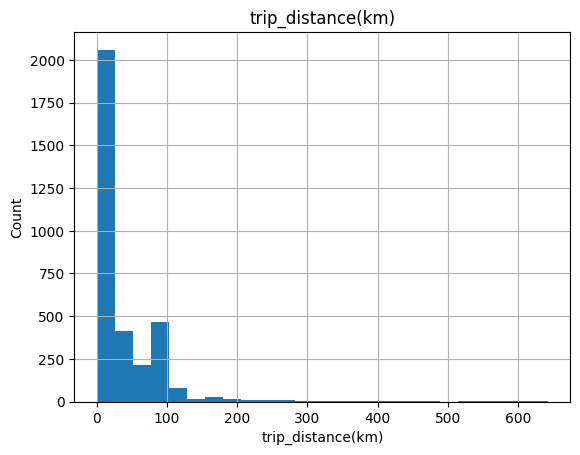

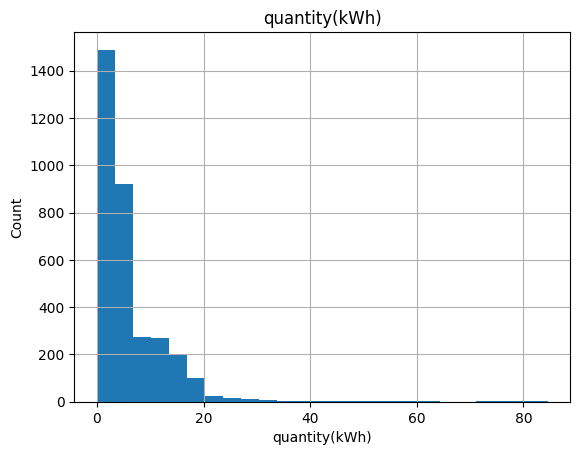

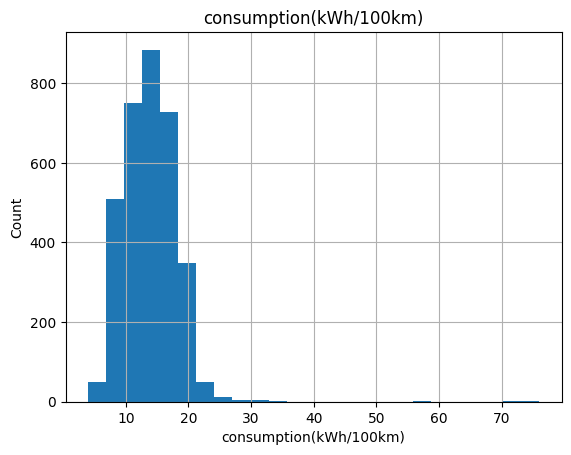

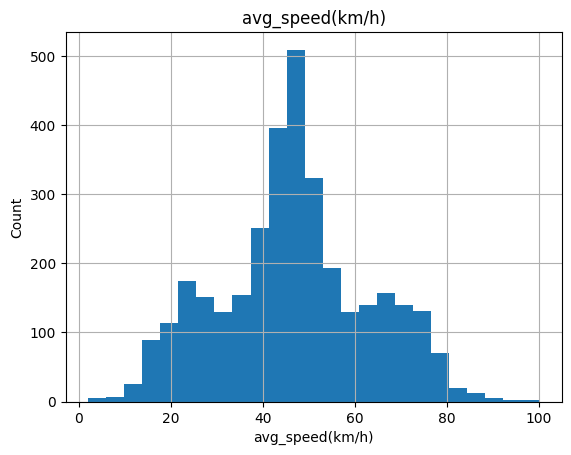

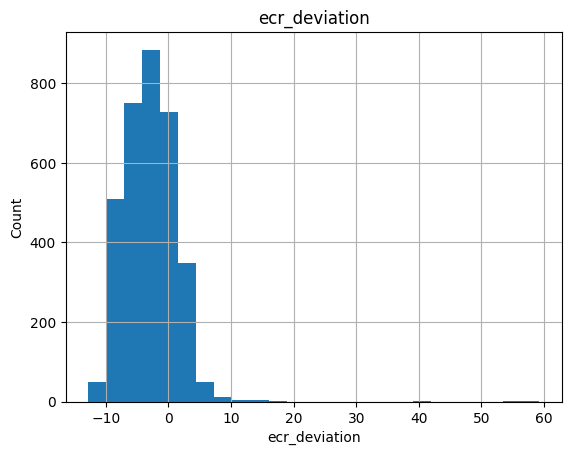

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data2=data.copy()
    data2[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


**Bivariate analysis**

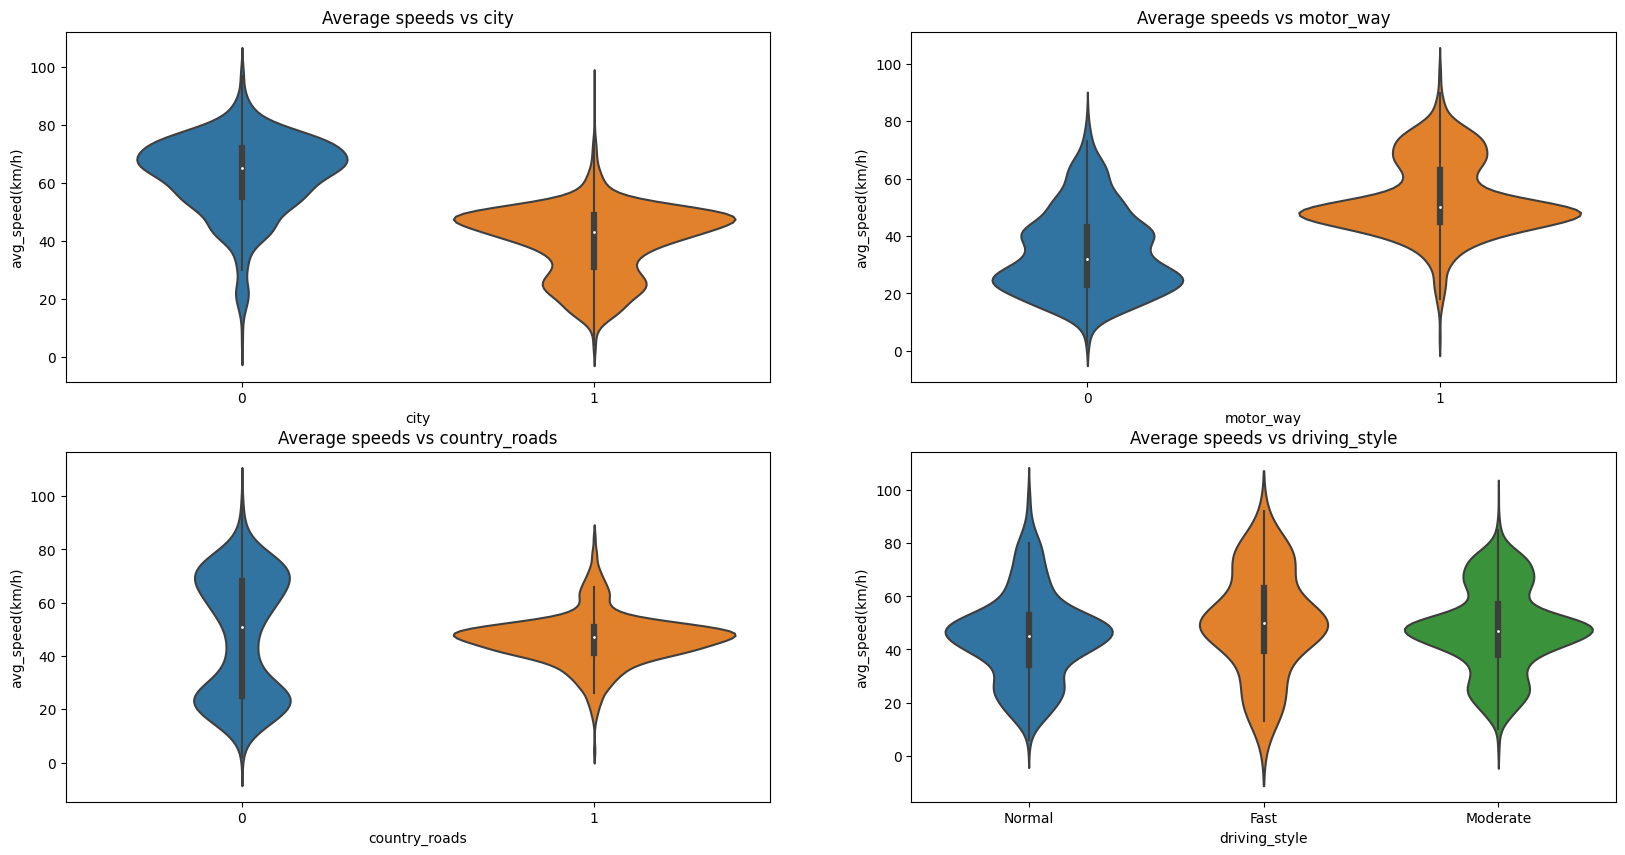

In [19]:
## Average speeds distribution among city, motor_way, driving style, country_roads

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Average speeds vs city")
sns.violinplot(x = 'city', y = 'avg_speed(km/h)', data = data)

plt.subplot(2, 2, 2)
plt.title("Average speeds vs motor_way")
sns.violinplot(x = 'motor_way', y = 'avg_speed(km/h)', data = data)

plt.subplot(2, 2, 3)
plt.title("Average speeds vs country_roads")
sns.violinplot(x = 'country_roads', y = 'avg_speed(km/h)', data = data)

plt.subplot(2, 2, 4)
plt.title("Average speeds vs driving_style")
sns.violinplot(x = 'driving_style', y = 'avg_speed(km/h)', data = data)

plt.show()

**Observation**
* InterQuartile Range of Avg_speed is clearly separated among city's. City '0' have higher avg speeds.
* InterQuartile Range of Avg_speed is clearly separated among motor_way's. Motor_way '1' have higher avg speeds.
* avg speed range is widespread in countryroad '0' compare to '1'.

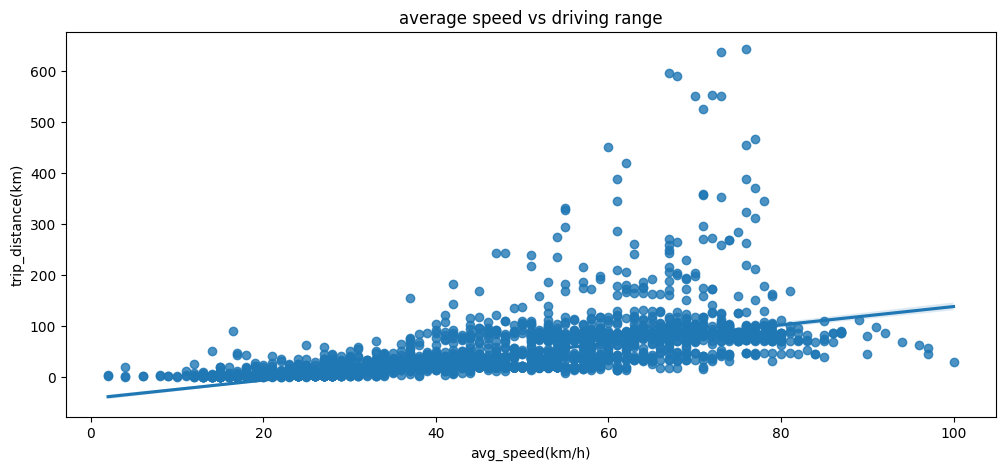

In [20]:
# role of avg_speed in driving_range
plt.figure(figsize=(12, 5))
plt.title("average speed vs driving range")
sns.regplot(x = 'avg_speed(km/h)', y = 'trip_distance(km)', data = data)
plt.show()

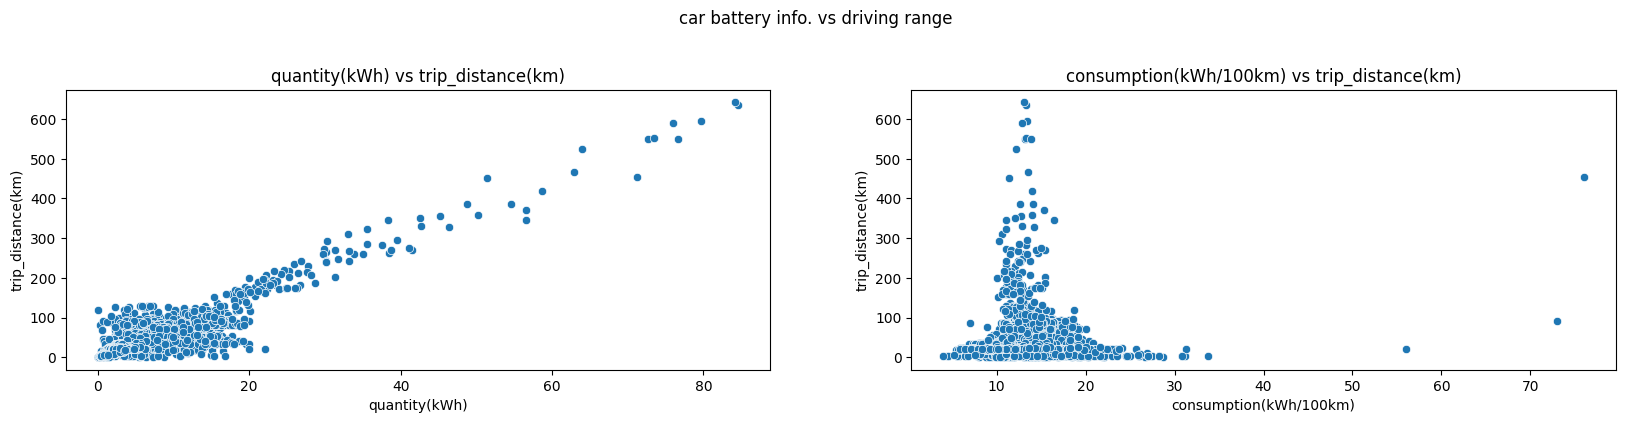

In [21]:
# Quantity on trip distance
plt.figure(figsize=(20, 8))
plt.suptitle("car battery info. vs driving range")
plt.subplot(2, 2, 1)
plt.title("quantity(kWh) vs trip_distance(km)")
sns.scatterplot(x = 'quantity(kWh)', y = 'trip_distance(km)', data = data)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs trip_distance(km)")
sns.scatterplot(x = 'consumption(kWh/100km)', y = 'trip_distance(km)', data = data)
plt.show()

<Axes: title={'center': 'consumption(kWh/100km) vs park_heating'}, xlabel='park_heating', ylabel='consumption(kWh/100km)'>

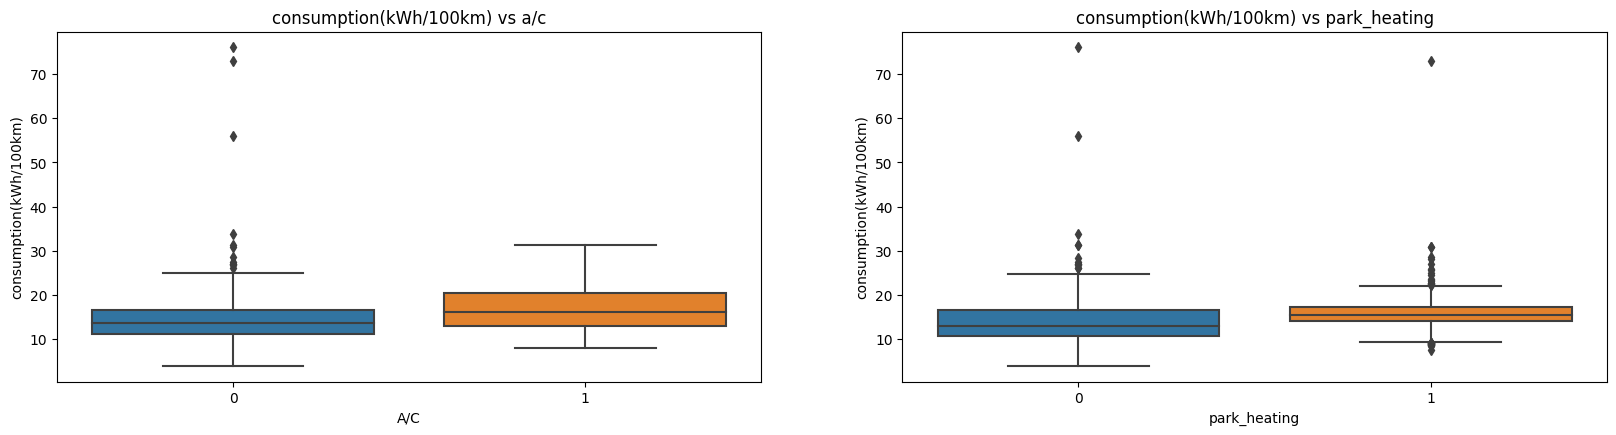

In [22]:
# a/c and park_heating effect on energy consumption

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("consumption(kWh/100km) vs a/c")
sns.boxplot(x = 'A/C', y = 'consumption(kWh/100km)', data = data)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs park_heating")
sns.boxplot(x = 'park_heating', y = 'consumption(kWh/100km)', data = data)

**One-Hot Encoding the categorical variables (Types of tires and driving styles)**

In [23]:
data.select_dtypes('object')

,tire_type,driving_style
0,Winter tires,Normal
1,Winter tires,Normal
2,Winter tires,Normal
3,Winter tires,Normal
4,Winter tires,Normal
...,...,...
3340,Winter tires,Normal
3341,Winter tires,Normal
3342,Winter tires,Normal
3343,Winter tires,Fast


**Observations**
* EV's trials are mostly in City and one way, moderately drived.
* EV's trials with a/c is on is very less. so the data is biased towards non-ac trials and with no park heating.

**Encoding**

* Tire type

In [24]:
for each in data['tire_type'].unique():
    data['tire_type '+each] = list(map(int, data['tire_type']==each))

data.drop(['tire_type'], axis=1, inplace=True)
data.head()

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,tire_type Winter tires,tire_type Summer tires
0,80.0,NaN,0,0,1,Normal,17.8,0,1,53.0,1.0,1,0
1,50.0,12.29,0,0,1,Normal,15.5,0,1,47.0,-1.3,1,0
2,43.0,8.68,0,1,1,Normal,18.0,0,1,58.0,1.2,1,0
3,44.0,1.50,0,1,1,Normal,16.1,0,1,43.0,-0.7,1,0
4,76.0,14.44,0,1,0,Normal,19.0,0,1,76.0,2.2,1,0


* Encoding driving style types

In [25]:
for each in data['driving_style'].unique():
    data['driving_style '+each] = list(map(int, data['driving_style']==each))

data.drop(['driving_style'], axis=1, inplace=True)
data.head()

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,tire_type Winter tires,tire_type Summer tires,driving_style Normal,driving_style Fast,driving_style Moderate
0,80.0,NaN,0,0,1,17.8,0,1,53.0,1.0,1,0,1,0,0
1,50.0,12.29,0,0,1,15.5,0,1,47.0,-1.3,1,0,1,0,0
2,43.0,8.68,0,1,1,18.0,0,1,58.0,1.2,1,0,1,0,0
3,44.0,1.50,0,1,1,16.1,0,1,43.0,-0.7,1,0,1,0,0
4,76.0,14.44,0,1,0,19.0,0,1,76.0,2.2,1,0,1,0,0


**Data splitting**

In [26]:
data = data.sample(frac=1)

Y = data['trip_distance(km)']
X = data.drop(['trip_distance(km)'], axis=1)

X.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y.reset_index(level=None, drop=True, inplace=True)

* Train 80% - Test 20%

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

X_train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train.reset_index(level=None, drop=True, inplace=True)
Y_test.reset_index(level=None, drop=True, inplace=True)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2672, 14) (2672,) (669, 14) (669,)


In [28]:
X_train.isnull().any()

quantity(kWh)              True
city                      False
motor_way                 False
country_roads             False
consumption(kWh/100km)    False
A/C                       False
park_heating              False
avg_speed(km/h)            True
ecr_deviation             False
tire_type Winter tires    False
tire_type Summer tires    False
driving_style Normal      False
driving_style Fast        False
driving_style Moderate    False
dtype: bool

* Imputing using mean

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

cols_with_missing_data = [cols for cols in X_train.columns
                         if X_train[cols].isnull().any()]

X_train_imputed_data_columns = pd.DataFrame(imputer.fit_transform(X_train[cols_with_missing_data]))
X_test_imputed_data_columns = pd.DataFrame(imputer.transform(X_test[cols_with_missing_data]))

X_train_imputed_data_columns.columns = cols_with_missing_data
X_test_imputed_data_columns.columns = cols_with_missing_data

X_train = pd.concat([X_train.drop(cols_with_missing_data, axis=1, inplace=False), X_train_imputed_data_columns], axis=1)
X_test = pd.concat([X_test.drop(cols_with_missing_data, axis=1, inplace=False), X_test_imputed_data_columns], axis=1)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2672 non-null   int64  
 1   motor_way               2672 non-null   int64  
 2   country_roads           2672 non-null   int64  
 3   consumption(kWh/100km)  2672 non-null   float64
 4   A/C                     2672 non-null   int64  
 5   park_heating            2672 non-null   int64  
 6   ecr_deviation           2672 non-null   float64
 7   tire_type Winter tires  2672 non-null   int64  
 8   tire_type Summer tires  2672 non-null   int64  
 9   driving_style Normal    2672 non-null   int64  
 10  driving_style Fast      2672 non-null   int64  
 11  driving_style Moderate  2672 non-null   int64  
 12  quantity(kWh)           2672 non-null   float64
 13  avg_speed(km/h)         2672 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 2

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    669 non-null    int64  
 1   motor_way               669 non-null    int64  
 2   country_roads           669 non-null    int64  
 3   consumption(kWh/100km)  669 non-null    float64
 4   A/C                     669 non-null    int64  
 5   park_heating            669 non-null    int64  
 6   ecr_deviation           669 non-null    float64
 7   tire_type Winter tires  669 non-null    int64  
 8   tire_type Summer tires  669 non-null    int64  
 9   driving_style Normal    669 non-null    int64  
 10  driving_style Fast      669 non-null    int64  
 11  driving_style Moderate  669 non-null    int64  
 12  quantity(kWh)           669 non-null    float64
 13  avg_speed(km/h)         669 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 73.

**Outlier analysis**

In [32]:
import numpy as np
from scipy.stats import norm
%matplotlib inline

# Outlier analysis is used for identifying outlying continuous data.
# In our dataset Quantity(kWh) & Avg_Speed(km/h) are the only continuos data apart from the target variable.

**Speed**

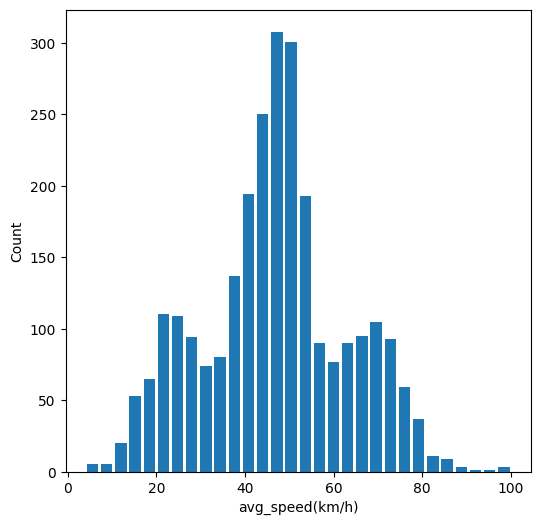

In [33]:
plt.figure(figsize=(6,6))
plt.hist(X_train['avg_speed(km/h)'], bins=30, rwidth=0.8)
plt.xlabel('avg_speed(km/h)')
plt.ylabel('Count')
plt.show()

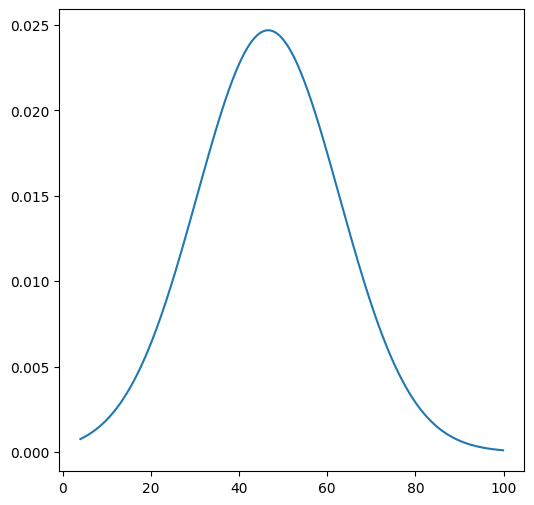

In [34]:
plt.figure(figsize=(6,6))
rng = np.arange(X_train['avg_speed(km/h)'].min(), X_train['avg_speed(km/h)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, X_train['avg_speed(km/h)'].mean(), X_train['avg_speed(km/h)'].std()))
plt.show()

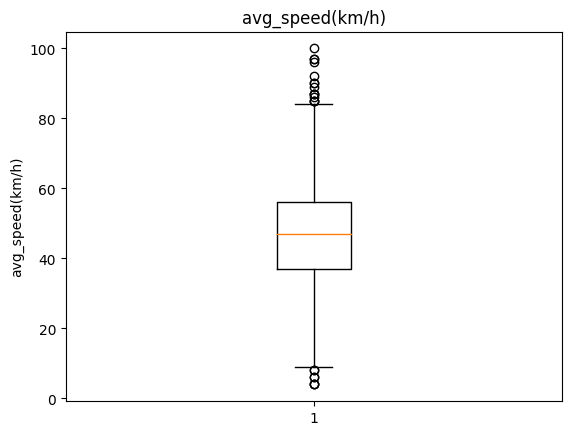

In [35]:
plt.boxplot(X_train['avg_speed(km/h)'])
plt.ylabel('avg_speed(km/h)')
plt.title('avg_speed(km/h)')
plt.show()

In [36]:
# We can see from the bell shaped curve that the data for average speed is normalized
# Thus removing outliers depending upon the z-score

X_train['Speed_z_score'] = (X_train['avg_speed(km/h)'] - X_train['avg_speed(km/h)'].mean())/X_train['avg_speed(km/h)'].std()
X_test['Speed_z_score'] = (X_test['avg_speed(km/h)'] - X_test['avg_speed(km/h)'].mean())/X_test['avg_speed(km/h)'].std()

# Reomving inputes with z-score of more than 3 or less than -3 for average speed
to_be_included_train = (X_train['Speed_z_score']<3) | (X_train['Speed_z_score']>-3)
to_be_included_test = (X_test['Speed_z_score']<3) | (X_test['Speed_z_score']>-3)

X_train = X_train[to_be_included_train]
Y_train = Y_train[to_be_included_train]

X_test = X_test[to_be_included_test]
Y_test = Y_test[to_be_included_test]

X_train.drop(['Speed_z_score'], axis=1, inplace=True)
X_test.drop(['Speed_z_score'], axis=1, inplace=True)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2672, 14) (2672,) (669, 14) (669,)


**Quantity**

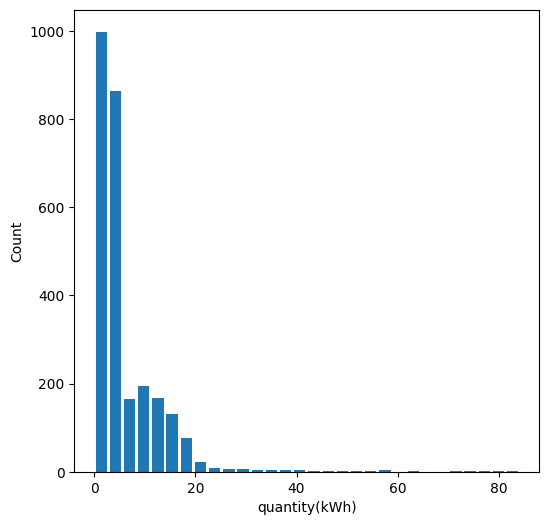

In [37]:
plt.figure(figsize=(6,6))
plt.hist(X_train['quantity(kWh)'], bins=30, rwidth=0.8)
plt.xlabel('quantity(kWh)')
plt.ylabel('Count')
plt.show()

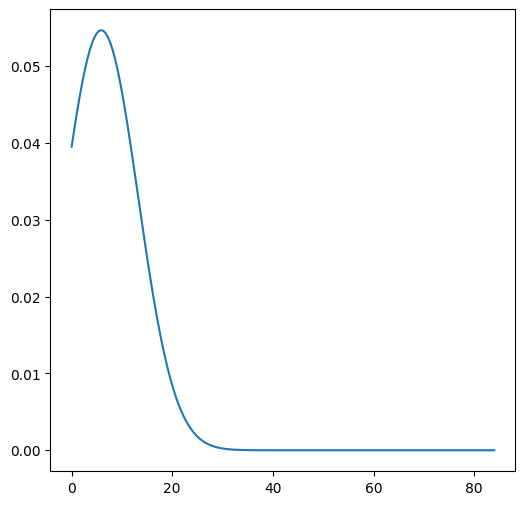

In [38]:
plt.figure(figsize=(6,6))
rng = np.arange(X_train['quantity(kWh)'].min(), X_train['quantity(kWh)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, X_train['quantity(kWh)'].mean(), X_train['quantity(kWh)'].std()))
plt.show()

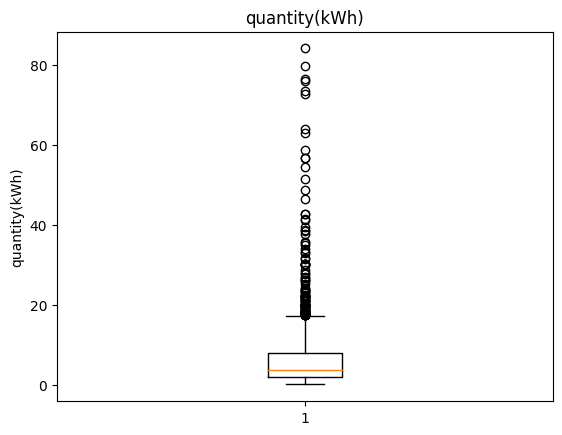

In [39]:
plt.boxplot(X_train['quantity(kWh)'])
plt.ylabel('quantity(kWh)')
plt.title('quantity(kWh)')
plt.show()

In [40]:
# We can see from the bell shaped curve that the data for average speed is normalized
# Thus removing outliers depending upon the z-score

# X_train['quan_z_score'] = (X_train['quantity(kWh)'] - X_train['quantity(kWh)'].mean())/X_train['quantity(kWh)'].std()
# X_test['quan_z_score'] = (X_test['quantity(kWh)'] - X_test['quantity(kWh)'].mean())/X_test['quantity(kWh)'].std()

# # Reomving inputes with z-score of more than 3 or less than -3 for average speed
# to_be_included_train = (X_train['quan_z_score']<3) | (X_train['quan_z_score']>-3)
# to_be_included_test = (X_test['quan_z_score']<3) | (X_test['quan_z_score']>-3)

# X_train = X_train[to_be_included_train]
# Y_train = Y_train[to_be_included_train]

# X_test = X_test[to_be_included_test]
# Y_test = Y_test[to_be_included_test]

# X_train.drop(['quan_z_score'], axis=1, inplace=True)
# X_test.drop(['quan_z_score'], axis=1, inplace=True)

# print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [41]:
# From the curve it is concluded that the Quantity(kWh) is not distributed normally
# Hence, removing all the rows with Quantity(kWh) greater than 65kWh

to_be_included_train = X_train['quantity(kWh)']<=65
to_be_included_test = X_test['quantity(kWh)']<=65

X_train = X_train[to_be_included_train]
Y_train = Y_train[to_be_included_train]

X_test = X_test[to_be_included_test]
Y_test = Y_test[to_be_included_test]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train.reset_index(level=None, drop=True, inplace=True)
Y_test.reset_index(level=None, drop=True, inplace=True)

(2666, 14) (2666,) (667, 14) (667,)


**Correlation  between features**

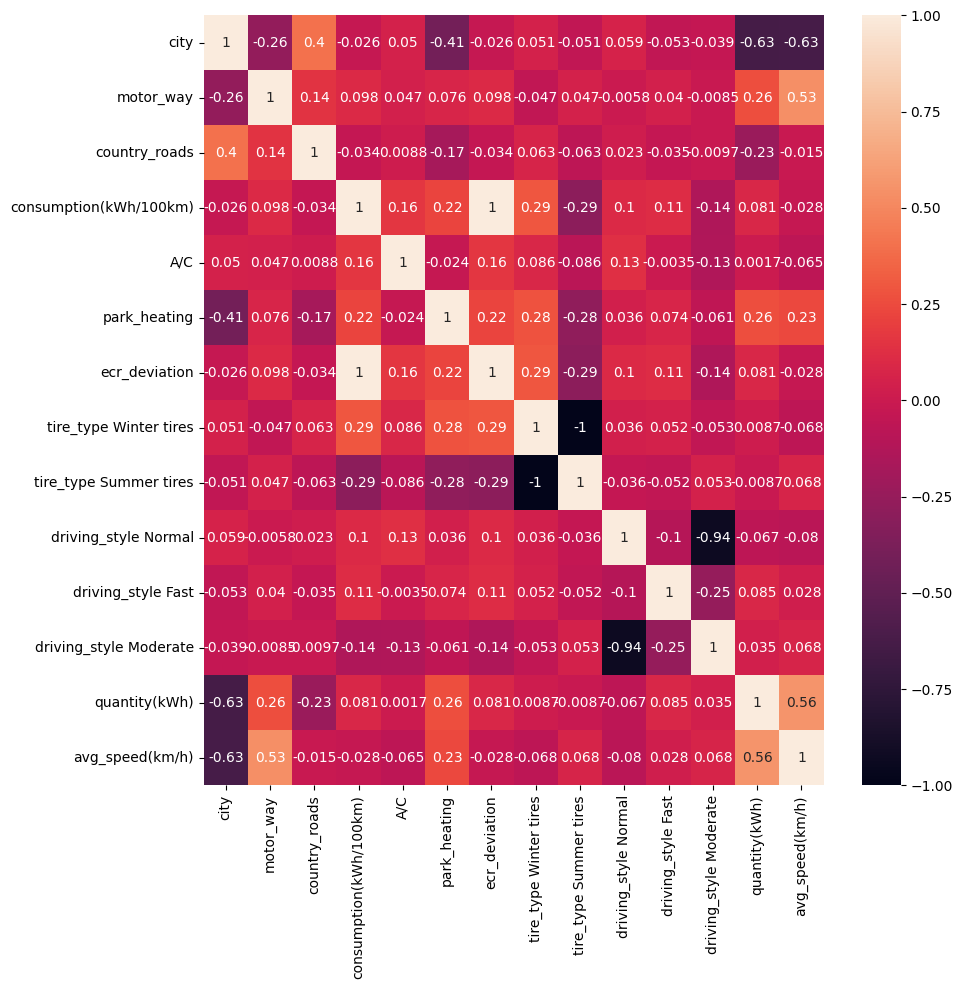

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(method='pearson'), annot=True)
plt.show()

As it could be seen from the heatmap that the Driving_Style Normal & Driving_Style Moderate are possessing strong negative correlation, one of them needs to be dropped. Same goes for Summer & winter tire types.

In [43]:
X_train = X_train.drop(['driving_style Normal', 'tire_type Summer tires'], axis=1)
X_test = X_test.drop(['driving_style Normal', 'tire_type Summer tires'], axis=1)

**Machine learning model**

In [44]:
import tensorflow as tf
# import tensorflowjs
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras import regularizers

* Normalizing the continuos features

In [45]:
# cols_to_be_normalized = ['quantity(kWh)', 'avg_speed(km/h)']

# for each in cols_to_be_normalized:
#     mean = X_train[each].mean()
#     std = X_train[each].std()

#     X_train[each] = (X_train[each] - mean)/std
#     X_test[each] = (X_test[each] - mean)/std

In [46]:
X_train

,city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,ecr_deviation,tire_type Winter tires,driving_style Fast,driving_style Moderate,quantity(kWh),avg_speed(km/h)
0,0,1,0,12.7,0,0,-4.1,0,0,1,9.30,72.0
1,1,0,0,5.5,0,0,-11.3,0,0,1,0.20,26.0
2,0,1,1,14.1,0,0,-2.7,0,0,0,18.70,54.0
3,1,1,1,18.2,0,0,1.4,0,0,1,3.64,47.0
4,0,1,0,15.3,0,1,-1.5,1,0,1,16.60,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2661,1,1,1,18.4,0,0,1.6,1,0,1,3.70,49.0
2662,1,0,0,12.4,0,0,-4.4,0,0,1,2.85,48.0
2663,1,1,1,19.1,0,1,2.3,0,0,1,3.82,40.0
2664,1,0,0,12.3,0,0,-4.5,0,0,1,0.60,20.0


In [47]:
X_test
X_test.to_csv('.//X_test_0.csv', index= False)

* Building model (Sequential)

In [48]:
# model = Sequential()
# model.add(Dense(units=16, activation='relu', input_dim=len(X_train.columns)))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='linear')) 

# batch_size = 16     # batch size for model fitting

# epochs = 1000       # number of epochs for model fitting

# STEPS_PER_EPOCH = X_train.shape[0]/batch_size

# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=0) # Early stopping to prevent overfitting
 
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(                  # Using a dynamic learning rate that decays a certain rate per 100 epochs
#   0.001,
#   decay_steps=STEPS_PER_EPOCH*100,
#   decay_rate=0.98,
#   staircase=False)        

# opt = tf.keras.optimizers.RMSprop(lr_schedule)   # Using RMSprop optimizer with the learning rate schedule as mentioned above

# model.compile(loss='mae', optimizer=opt, metrics=['mae'])
# model.summary()

In [49]:
model = Sequential()
model.add(LSTM(16, input_shape=(len(X_train.columns),1), return_sequences=True,activation='tanh'))
model.add(LSTM(32,return_sequences=False,activation='tanh'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear')) 

batch_size = 16     # batch size for model fitting

epochs = 1000       # number of epochs for model fitting

STEPS_PER_EPOCH = X_train.shape[0]/batch_size

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1) # Early stopping to prevent overfitting
 
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(                  # Using a dynamic learning rate that decays a certain rate per 100 epochs
  0.001,
  decay_steps=STEPS_PER_EPOCH*100,
  decay_rate=0.98,
  staircase=False)        

opt = tf.keras.optimizers.RMSprop(lr_schedule)   # Using RMSprop optimizer with the learning rate schedule as mentioned above

model.compile(loss='mae', optimizer=opt, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 16)            1152      
                                                                 
 lstm_1 (LSTM)               (None, 32)                6272      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 48)                1584      
                                                                 
 dense_2 (Dense)             (None, 64)                3136      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,265
Trainable params: 13,265
Non-traina

* Training the model

In [50]:
hs = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], validation_split=0.2, validation_data=None, verbose=1)

Epoch 1/1000
134/134 [==============================] - 6s 14ms/step - loss: 28.5502 - mae: 28.5502 - val_loss: 25.2597 - val_mae: 25.2597
Epoch 2/1000
134/134 [==============================] - 1s 6ms/step - loss: 26.1156 - mae: 26.1156 - val_loss: 22.9959 - val_mae: 22.9959
Epoch 3/1000
134/134 [==============================] - 1s 6ms/step - loss: 22.3735 - mae: 22.3735 - val_loss: 19.7105 - val_mae: 19.7105
Epoch 4/1000
134/134 [==============================] - 1s 7ms/step - loss: 16.5743 - mae: 16.5743 - val_loss: 12.2250 - val_mae: 12.2250
Epoch 5/1000
134/134 [==============================] - 1s 7ms/step - loss: 13.5787 - mae: 13.5787 - val_loss: 10.7350 - val_mae: 10.7350
Epoch 6/1000
134/134 [==============================] - 1s 6ms/step - loss: 12.4046 - mae: 12.4046 - val_loss: 11.3832 - val_mae: 11.3832
Epoch 7/1000
134/134 [==============================] - 1s 7ms/step - loss: 12.0467 - mae: 12.0467 - val_loss: 14.3526 - val_mae: 14.3526
Epoch 8/1000
134/134 [===========

In [51]:
h=hs.history
h.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

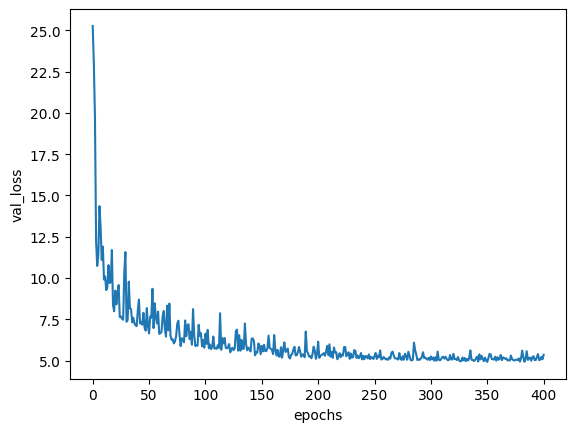

In [52]:
plt.ylabel('val_loss')
plt.xlabel('epochs')
plt.plot(h['val_loss'])
plt.show()

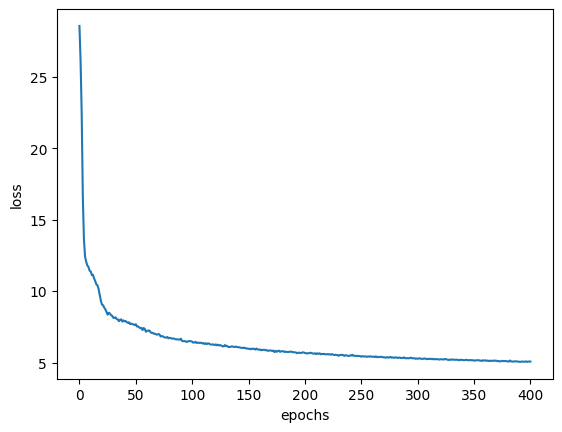

In [53]:
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(h['loss'])
plt.show()

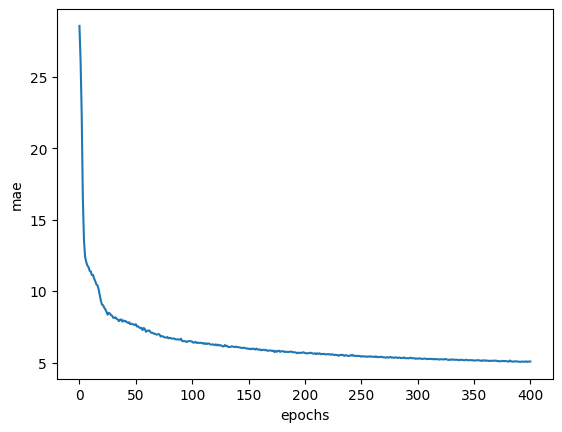

In [54]:
plt.ylabel('mae')
plt.xlabel('epochs')
plt.plot(h['mae'])

**Testing**

* Saving the model

In [55]:
import tensorflowjs

model.save('range_prediction_model.h5')
tensorflowjs.converters.save_keras_model(model, './/JSON')

In [56]:
import pickle

pickle.dump(model,open('range_model.pkl','wb'))

In [57]:
from sklearn.metrics import mean_absolute_error
predictions = (model.predict(X_test))
Y_test.to_csv('.//y_test.csv', index= False)
pd.DataFrame(predictions).to_csv('.//predictions.csv', index= False)
print(mean_absolute_error(Y_test, predictions))

21/21 [==============================] - 1s 2ms/step
6.59986744211174


In [58]:
#Accuracy of model
# acc = 1 - np.sqrt(mean_absolute_error(Y_test, predictions))
# acc

In [59]:
compare = pd.concat([pd.DataFrame(predictions), pd.DataFrame(Y_test)], axis=1)
compare.columns = ['Predictions', 'Actual Output']
compare

,Predictions,Actual Output
0,224.797546,206.0
1,88.032219,82.0
2,20.258911,20.0
3,20.534006,20.0
4,23.024990,23.0
...,...,...
662,22.929346,22.0
663,20.144632,20.0
664,91.020248,87.0
665,186.518188,175.0


* standard deviation of the test labels

In [60]:
Y_test.std()

45.04765203229007